# Temporal Networks v1.0 #

In [7]:
import sys
sys.path.append("/home/genois/Bureau/tempnet/")
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from math import log

In [3]:
import tempnet.utils as tnu
import tempnet.measures as tnm
import tempnet.randomisations as tnr

## Timeline shuffling - events ##
We here present randomization techniques which shuffle the timelines of contact of links in the static network, for events with durations. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Global contact shuffling on the aggregated network $\text{P}[\mathcal{L},p(\tau)]$: `P__L_ptau(lks_data,ti,tf,dt)` ###
This function shuffles contacts between all the links of a `link_timeline()` object `lks_data` while preserving their duration. The initial time `ti`, the final time `tf` and the time step duration `dt` are required.

In [4]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__L_ptau(lks_data,0,60480,1)

Test of the modification of the activity timeline:

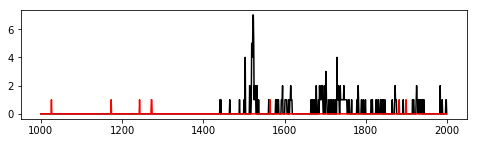

In [5]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the preservation of the $p_\tau$:

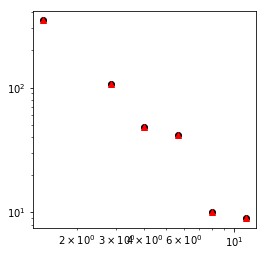

In [8]:
list_tau0 = tnm.contact_durations(lks_data)
list_tau1 = tnm.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

### Permutation of contacts within timelines $\text{P}[\pi_\mathcal{L}(\tau)]$: `P__pitau(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the contacts within each timeline of a `link_timeline()` object `lks_data`, with new initial starting points chosen uniformly. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__pitau(lks_data,0,60480,1)

Test of the preservation of the $\pi_\tau$ and not preservation of $\pi_{\Delta\tau}$:

In [4]:
dict_tau0 = tnm.contact_durations(lks_data)
dict_dtau0 = tnm.intercontact_durations(lks_data)
dict_tau1 = tnm.contact_durations(new_lks)
dict_dtau1 = tnm.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True False


Test of the modification of the activity timeline:

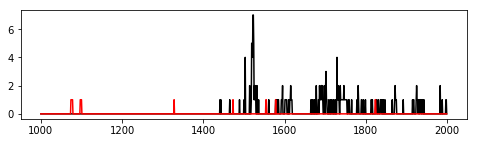

In [5]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Contacts shuffling $\text{P}[\pi_\mathcal{L}(\tau),\mathbf{t}^1,\mathbf{t}^w]$: `P__pitau_t1_tw(lks_data,dt)` ###
This function randomly shuffles the contacts of a timeline within $[t^1,t^w]$, for each timeline of a `link_timeline()` object `lks_data`. The time step duration `dt` is required.

In [6]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__pitau_t1_tw(lks_data,1)

Test of the modification of the activity timeline:

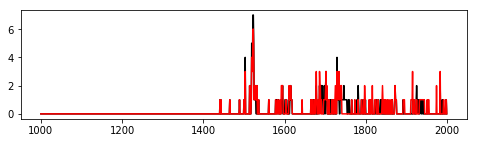

In [7]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of contacts and intercontacts within timelines $\text{P}[\pi_\mathcal{L}(\tau),\pi_\mathcal{L}(\Delta \tau)]$: `P__pitau_pidtau(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the contacts and intercontacts within each timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [8]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__pitau_pidtau(lks_data,0,60480,1)

Test of the preservation of the $\pi_\tau$ and $\pi_{\Delta\tau}$:

In [9]:
dict_tau0 = tnm.contact_durations(lks_data)
dict_dtau0 = tnm.intercontact_durations(lks_data)
dict_tau1 = tnm.contact_durations(new_lks)
dict_dtau1 = tnm.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True True


Test of the modification of the activity timeline:

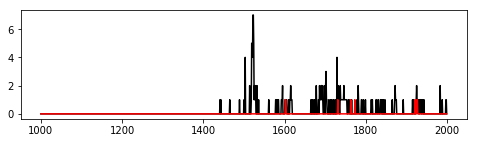

In [10]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of contacts and intercontacts within timelines with initial time $\text{P}[\pi_\mathcal{L}(\tau),\pi_\mathcal{L}(\Delta \tau),\mathbf{t}_1]$: `P__pitau_pidtau_t1(lks_data)` ###
This function randomly permutates the contacts and intercontacts within each timeline of a `link_timeline()` object `lks_data` while keeping the initial time.

In [11]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__pitau_pidtau_t1(lks_data)

Test of the preservation of $\pi_\tau$ and $\pi_{\Delta\tau}$:

In [12]:
dict_tau0 = tnm.contact_durations(lks_data)
dict_dtau0 = tnm.intercontact_durations(lks_data)
dict_tau1 = tnm.contact_durations(new_lks)
dict_dtau1 = tnm.intercontact_durations(new_lks)
Test_tau = np.array([set(dict_tau0[lk]) == set(dict_tau1[lk]) for lk in lks_data.links()])
Test_dtau = np.array([set(dict_dtau0[lk]) == set(dict_dtau1[lk]) for lk in lks_data.links()])
print Test_tau.all(),Test_dtau.all()

True True


Test of the modification of the activity timeline:

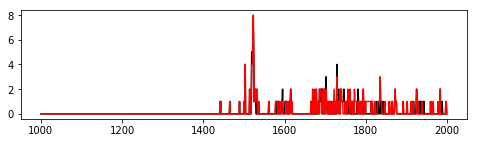

In [13]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of intercontacts $\text{P}[\pi_\mathcal{L}(\Delta \tau)]$, $\text{P}[\pi_\mathcal{L}(\Delta \tau),\mathbf{t}_1]$: ###
These shufflings randomly permutate the intercontacts within each timeline of a `link_timeline()` object `lks_data` while breaking the contacts into instant-events. In order to implement this, simply transform the `link_timeline()` object with durations in `link_timeline()` object with instant-events with the following method:

In [9]:
seq_data = tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480)
new_lks = tnu.snapshot_sequence_to_link_timeline(seq_data,1,join=False)

The new `link_timeline()` object can then be randomised using the two functions `P__pitau_pidtau(lks_data,t_i,t_f,dt)` and `P__pitau_pidtau_t1(lks_data,t_i,t_f,dt)` described previously.

### Periodic boundary offset shuffling $\text{P}[\mathbf{per}(\Theta)]$: `P__perTheta(lks_data,t_i,t_f,dt)` ###
This function randomly offsets the time stamps of all contacts of a timeline, for each timeline of a `link_timeline()` object `lks_data`, with periodic boundary conditions between $t_i$ and $t_f$. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [14]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__perTheta(lks_data,0,60480,1)

Test of the modification of the activity timeline:

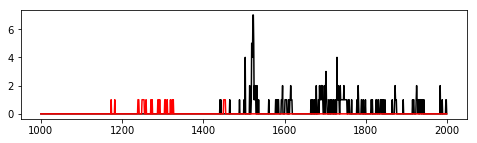

In [15]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Offset shuffling $\text{P}[\tau,\Delta\tau]$: `P__tau_dtau(lks_data,t_i,t_f,dt)` ###
This function randomly offsets the time stamps of all contacts of a timeline within $[t_i,t_f]$, for each timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

In [16]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_lks = tnr.P__tau_dtau(lks_data,0,60480,1)

Test of the modification of the activity timeline:

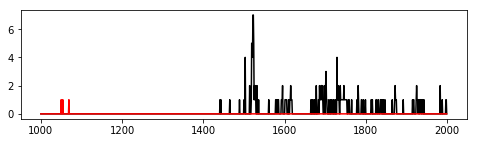

In [17]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()